<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generating Synthetic Data ---
Training samples: 225, Test samples: 75
Training class distribution (0/1): 112/113
Test class distribution (0/1): 37/38

Features scaled successfully.

--- Training Logistic Regression Model ---
Iteration 0/3000: Cost = 0.693147
Iteration 300/3000: Cost = 0.028156
Iteration 600/3000: Cost = 0.014937
Iteration 900/3000: Cost = 0.010310
Iteration 1200/3000: Cost = 0.007927
Iteration 1500/3000: Cost = 0.006465
Iteration 1800/3000: Cost = 0.005473
Iteration 2100/3000: Cost = 0.004754
Iteration 2400/3000: Cost = 0.004208
Iteration 2700/3000: Cost = 0.003778

--- Evaluating Model Performance ---
Accuracy on test set: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00

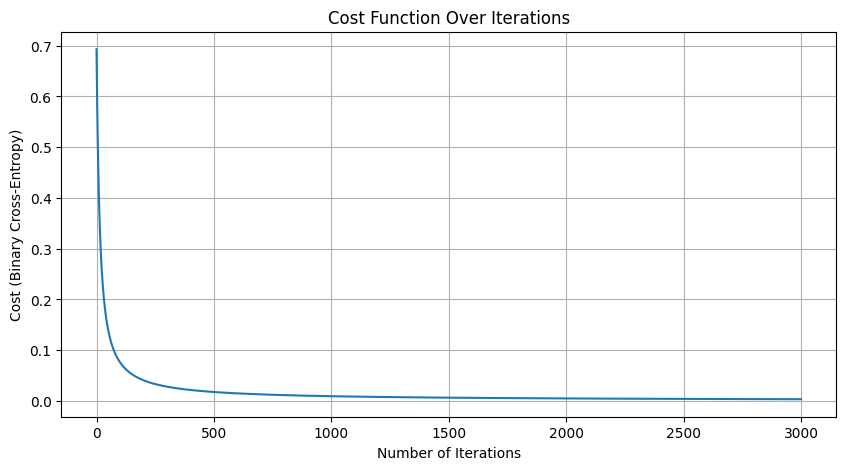

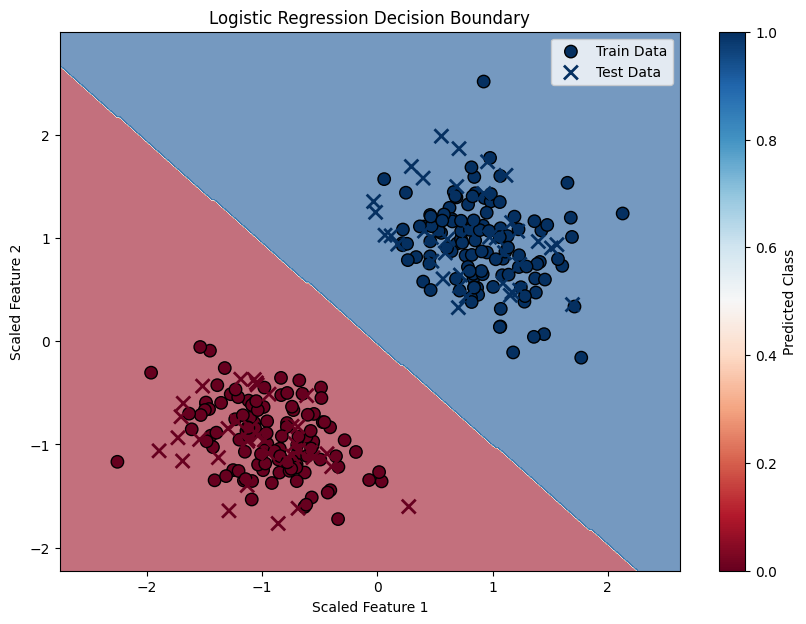

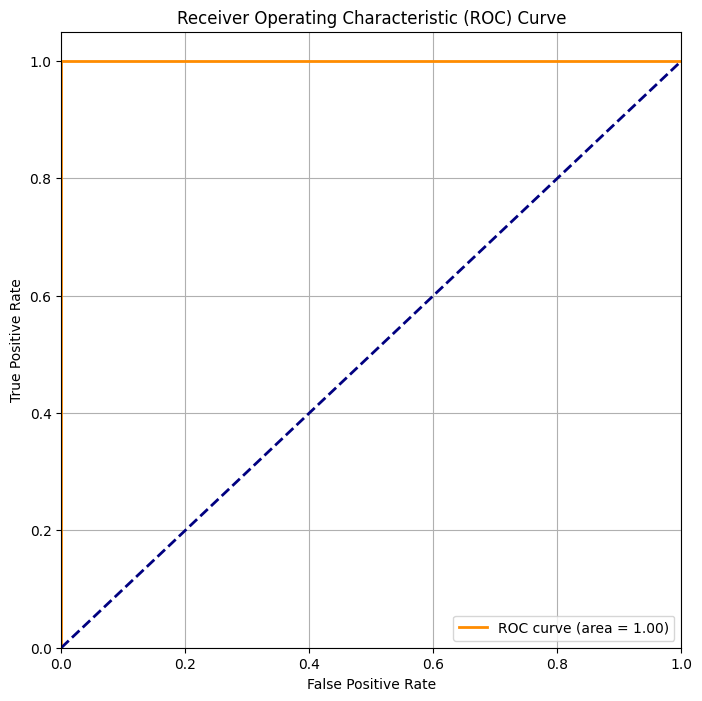

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# --- 1. Logistic Regression Model Implementation (From Scratch) ---

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, random_state=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.costs = [] # To store cost at each iteration for analysis

        if self.random_state is not None:
            np.random.seed(self.random_state)

    def _sigmoid(self, z):
        """
        The sigmoid activation function.
        g(z) = 1 / (1 + e^(-z))
        """
        # Clip z to prevent overflow issues with large positive/negative values
        # which can lead to exp(-z) becoming inf or 0, causing division by zero or NaN.
        z = np.clip(z, -500, 500) # Arbitrary clipping values, can be adjusted
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Trains the logistic regression model using gradient descent.

        Args:
            X (numpy.ndarray): Training features, shape (n_samples, n_features).
            y (numpy.ndarray): Target labels (0 or 1), shape (n_samples,).
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            # Calculate linear combination (z = X * weights + bias)
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid to get predicted probabilities (h_theta(x))
            y_predicted = self._sigmoid(linear_model)

            # Calculate gradients of the cost function with respect to weights and bias
            # dw = (1/m) * X_T * (y_predicted - y)
            # db = (1/m) * sum(y_predicted - y)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store the cost (optional, for monitoring convergence)
            cost = self._compute_cost(y, y_predicted)
            self.costs.append(cost)

            # Print cost periodically
            if i % (self.n_iterations // 10) == 0:
                print(f"Iteration {i}/{self.n_iterations}: Cost = {cost:.6f}")

    def _compute_cost(self, y_true, y_predicted):
        """
        Computes the binary cross-entropy (log-loss) cost.
        J(theta) = -(1/m) * sum[y*log(h_theta(x)) + (1-y)*log(1-h_theta(x))]
        """
        # Avoid log(0) by clipping predictions to a very small positive value
        # and a value slightly less than 1.
        epsilon = 1e-10
        y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)

        cost = - (1 / len(y_true)) * np.sum(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))
        return cost

    def predict_proba(self, X):
        """
        Predicts probabilities for new samples.

        Args:
            X (numpy.ndarray): Features of new samples, shape (n_samples, n_features).

        Returns:
            numpy.ndarray: Predicted probabilities (between 0 and 1), shape (n_samples,).
        """
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_model)
        return probabilities

    def predict(self, X, threshold=0.5):
        """
        Predicts class labels (0 or 1) based on a probability threshold.

        Args:
            X (numpy.ndarray): Features of new samples, shape (n_samples, n_features).
            threshold (float): The probability threshold for classifying as class 1.

        Returns:
            numpy.ndarray: Predicted class labels (0 or 1), shape (n_samples,).
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# --- 2. Data Generation ---

def generate_synthetic_data(n_samples=200, n_features=2, random_state=42):
    """
    Generates a simple 2-feature, 2-class synthetic dataset.
    """
    np.random.seed(random_state)

    # Create features (X)
    X = np.random.randn(n_samples, n_features)

    # Create labels (y) based on a simple linear separation with some noise
    # For example, y = 1 if x1 + x2 > 0, else 0
    y = ((X[:, 0] + X[:, 1] + np.random.randn(n_samples) * 0.8) > 0).astype(int)

    # Make classes more separated for better visualization
    X[y == 0, 0] -= 1.5
    X[y == 0, 1] -= 1.5
    X[y == 1, 0] += 1.5
    X[y == 1, 1] += 1.5

    return X, y

# --- 3. Main Execution Block ---

if __name__ == "__main__":
    # --- A. Generate and Prepare Data ---
    print("--- Generating Synthetic Data ---")
    X, y = generate_synthetic_data(n_samples=300, n_features=2, random_state=42)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    print(f"Training class distribution (0/1): {np.sum(y_train == 0)}/{np.sum(y_train == 1)}")
    print(f"Test class distribution (0/1): {np.sum(y_test == 0)}/{np.sum(y_test == 1)}")

    # Feature Scaling (Crucial for Gradient Descent)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("\nFeatures scaled successfully.")

    # --- B. Initialize and Train the Model ---
    print("\n--- Training Logistic Regression Model ---")
    model = LogisticRegression(learning_rate=0.1, n_iterations=3000, random_state=1)
    model.fit(X_train_scaled, y_train)

    # --- C. Evaluate the Model ---
    print("\n--- Evaluating Model Performance ---")
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Calculate ROC AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # --- D. Visualization ---
    print("\n--- Plotting Results ---")

    # Plot Cost vs. Iterations
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(model.costs)), model.costs)
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost (Binary Cross-Entropy)')
    plt.grid(True)
    plt.show()

    # Plot Decision Boundary (for 2D data)
    if X_train_scaled.shape[1] == 2:
        plt.figure(figsize=(10, 7))
        ax = plt.gca()

        # Create a meshgrid for plotting decision boundary
        x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
        y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        # Predict classes for each point in the meshgrid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)

        # Plot the training points
        plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k', s=80, label='Train Data')

        # Plot the test points
        plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', s=100, linewidth=2, label='Test Data')

        plt.title('Logistic Regression Decision Boundary')
        plt.xlabel('Scaled Feature 1')
        plt.ylabel('Scaled Feature 2')
        plt.colorbar(label='Predicted Class')
        plt.legend()
        plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()